<h2> Численное интегрирования

In [1]:
import numpy as np
from scipy import linalg as LA
import math
import matplotlib.pyplot as plt

<h2> Задание 1

1.1 Рассчитайте по квадратурным формулам Ньютона-Котеса (формула прямоугольников, формула трапеций, формула Симпсона, «правило 3/8») определённый интеграл $\int_{0}^{5}x^{2}cos(x)ln(x+1)e^{x^{2}}dx$. Для расчёта возмите 12 точек. Сравните результаты для разных формул и на отдельном графике погрешность при расчёте на разном разбиении отрезка интегрирования.

1.2 Проведите аналогичный расчёт для 120 и 1200 точек. Сравните результаты для разных формул.

1.3 Рассчитайте по квадратурным формулам Ньютона-Котеса (формула прямоугольников, формула трапеций, формула Симпсона, «правило 3/8») определённый интеграл $\int_{0}^{1}(x^{2} + 2x -1)dx$. Для расчёта возмите 12 точек. Сравните результаты для разных квадратурных формул и на отдельном графике погрешность при расчёте при разном разбиении отрезка интегрирования.
Сравните результаты с точным значением интеграла. Постройте график зависимости нормы погрешности от шага интегрирования (или разбиения отрезка интегрирования).

1.4 Проведите аналогичный расчёт для 120 и 1200 точек (из п. 1.3). Сравните результаты для разных формул и оцените погрешность при расчёте на разном разбиении отрезка интегрирования.

**1.1**

In [2]:
def func_1(x):
    res = x * x * np.cos(x)  * np.log(x + 1) * np.exp(x * x)
    return res

In [3]:
# формула прямоугольников (правых)
def squares(f, N, a, b):
    xes = np.array(np.linspace(a, b, N))
    integral = 0
    for i in range(xes.shape[0] - 1):
        integral += (xes[i+1] - xes[i]) * f(xes[i+1])
    return integral


# формула трапеций
def trapezes(f, N, a, b):
    xes = np.array(np.linspace(a, b, N))
    integral = 0
    for i in range(xes.shape[0] - 1):
        integral += 0.5 * (xes[i+1] - xes[i]) * (f(xes[i]) + f(xes[i+1]))
    return integral
   
    
# формула Симпсона
def simpson(f, N, a, b):
    xes = np.array(np.linspace(a, b, N))
    integral = 0
    for i in range(xes.shape[0] - 1):
        integral += (xes[i+1] - xes[i]) * (f(xes[i]) + f(xes[i+1]) + 4 * f(0.5*(xes[i+1] - xes[i]) + xes[i])) / 6
    return integral


# "правило 3/8"
def threes(f, N, a, b):
    xes = np.array(np.linspace(a, b, N))
    integral = 0
    for i in range(xes.shape[0] - 1):
        integral += (xes[i+1] - xes[i]) * (f(xes[i]) + 3 * f(xes[i] + (xes[i+1] - xes[i])/3) + 3 * 
                                           f(xes[i] + 2 * (xes[i+1] - xes[i])/3) + f(xes[i+1])) / 8
    return integral

In [4]:
print('Формула прямоугольников, 12 точек: ', squares(func_1, 12, 0, 5))
print('Формула трапеций, 12 точек: ', trapezes(func_1, 12, 0, 5))
print('Формула Симпсона, 12 точек: ', simpson(func_1, 12, 0, 5))
print('Правило 3/8, 12 точек: ', threes(func_1, 12, 0, 5))

Формула прямоугольников, 12 точек:  413222397392.9028
Формула трапеций, 12 точек:  205285991687.53528
Формула Симпсона, 12 точек:  73657804887.29134
Правило 3/8, 12 точек:  65890518206.4994


Как мы видим, все результаты очень болишие, но по порядку примерно совпадают друг с другом.

Погрешность при разном разбиении отрезка интегрирования (т.е на разное число частей).


In [5]:
def der_func_1(x):
    res = (np.exp(1) ** (x** 2) * x * x * np.cos(x))/(x + 1) - np.exp(1) ** (x** 2) * x * x * np.log(x + 1) * np.sin(x) 
    res += 2 * np.exp(1) ** (x** 2) * x * np.log(x + 1) * np.cos(x) + 2 * np.exp(1) ** (x** 2) * (x ** 3)* np.log(x + 1) * np.cos(x)
    return res

In [20]:
def der2_func_1(x):
    res = (8 * np.exp(x ** 2) * x**2 + (4 *  np.exp(x ** 2) * x **2 + 2 *np.exp(x ** 2) )* x **2 + 2 * np.exp(x ** 2)) *np.log(x + 1) *np.cos(x) 
    res += np.exp(x ** 2) * x**2 * (-(2* np.sin(x))/(x + 1) - np.cos(x)/(x + 1)**2 - np.log(x + 1) *np.cos(x)) + 2 *(2*  np.exp(x ** 2) * x + 2 * np.exp(x ** 2) * x**3) *(np.cos(x)/(x + 1) - np.log(x + 1) *np.sin(x))
    
    return res

In [39]:
def der4_func_1(x):
    res = np.exp(x ** 2) * x**2 *((4 *np.sin(x))/(x + 1) - (8 *np.sin(x))/(x + 1)**3 + (6 *np.cos(x))/(x + 1)**2 - (6 *np.cos(x))/(x + 1)**4 + np.log(x + 1) * np.cos(x))
    res += 6 * (8 * np.exp(x ** 2) * x**2 + (4 *np.exp(x ** 2) * x**2 + 2*np.exp(x ** 2)  ) *x**2 + 2* np.exp(x ** 2)  ) * (-(2 *np.sin(x))/(x + 1) - np.cos(x)/(x + 1)**2 - np.log(x + 1)* np.cos(x)) 
    res += 4 *(12* np.exp(x ** 2) * x + 6 *(4 * np.exp(x ** 2) * x**2 + 2* np.exp(x ** 2)) *x + (12 * np.exp(x ** 2) * x + 8 * np.exp(x ** 2) * x**3)* x**2) *(np.cos(x)/(x + 1) - np.log(x + 1) *np.sin(x)) 
    res += 4 *(2 * np.exp(x ** 2)* x + 2 * np.exp(x ** 2) * x**3) *((3* np.sin(x))/(x + 1)**2 - (3 *np.cos(x))/(x + 1) + (2 *np.cos(x))/(x + 1)**3 + np.log(x + 1) *np.sin(x)) 
    res += (12 * (4 *np.exp(x ** 2) * x**2 + 2*np.exp(x ** 2) ) + (48 *np.exp(x ** 2)* x**2 + 12 *np.exp(x ** 2) + 16 *np.exp(x ** 2)* x**4) *x**2  + 8 *(12 *np.exp(x ** 2)* x + 8 *np.exp(x ** 2)* x**3)* x) *np.log(x + 1) *np.cos(x)
    
    return res

In [41]:
def max_f(f, a, b):
    mm = 0.0
    xes = np.linspace(a, b, 10000)
    for x in xes:
        if (abs(f(x)) > mm):
            mm = abs(f(x))
            
    return mm

In [42]:
def err_squares(a, b, n, der_f):
    max_abs = max_f(der_f, a, b)
    h = (b-a) / (n-1)
    eps = max_abs * (b-a) * h
    return eps

def err_trapezes(a, b, n, der2_f):
    max_abs = max_f(der2_f, a, b)
    h = (b-a) / (n-1)
    eps = max_abs * (b-a) * h * h/12
    return eps

def err_simpson(a, b, n, der4_f):
    max_abs = max_f(der4_f, a, b)
    h = (b-a) / (n-1)
    eps = max_abs * (b-a) * h * h * h * h/2880
    return eps

def err_threes(a, b, n, der4_f):
    max_abs = max_f(der4_f, a, b)
    h = (b-a) / (n-1)
    eps = max_abs * (b-a) * h * h * h * h/6480
    return eps

In [46]:
print('Ошибка: формула прямоугольников, 12 точек: ', err_squares(0, 5, 12, der_func_1))
print('Ошибка: формула трапеций, 12 точек: ', err_trapezes(0, 5, 12, der2_func_1))
print('Ошибка: формула Симпсона, 12 точек: ', err_simpson(0, 5, 12, der4_func_1))
print('Ошибка: правило 3/8, 12 точек: ', err_threes(0, 5, 12, der4_func_1))

Ошибка: формула прямоугольников, 12 точек:  28848126787796.26
Ошибка: формула трапеций, 12 точек:  14330511824431.432
Ошибка: формула Симпсона, 12 точек:  1966702897199.2124
Ошибка: правило 3/8, 12 точек:  874090176532.9833


Как мы видим, ошибки очень большие (это за счет того, что само значение интеграла очень большое при $x>1$. К слову, при интегрировании от 0 до 1 (а не до 5) даже на 12 точках погрешность даже у формулы прямоугольников получается $0.292814305$, а при увеличении верхней границы интегрирования с 1 до 5 растет как значение интеграла, так и ошибка вычислений).

Рассмотрим график для ошибок (сразу пример в рассмотрение следующий пункт 1.2 и построим до 120)

In [53]:
Ns = np.arange(2, 121, 2)
err_sq1 = []
err_trap1 = []
err_simp1 = []
err_thre1 = []

for N in Ns:
    err_sq1.append(err_squares(0, 5, N, der_func_1))
    err_trap1.append(err_trapezes(0, 5, N, der2_func_1))
    err_simp1.append(err_simpson(0, 5, N, der4_func_1))
    err_thre1.append(err_threes(0, 5, N, der4_func_1))
    #print(N)

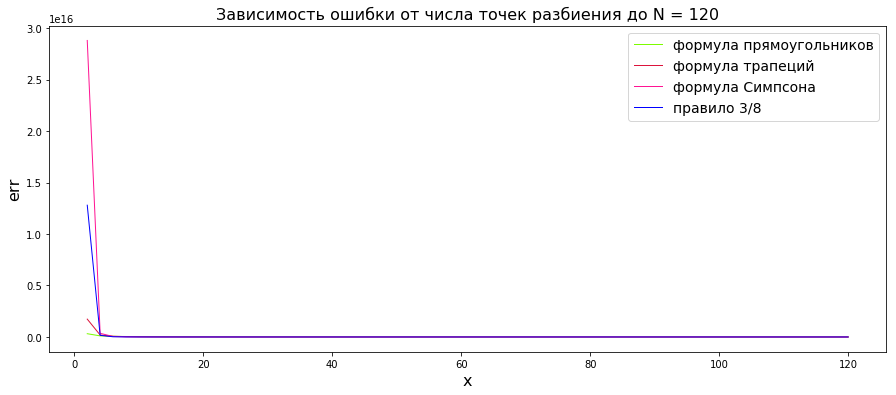

In [55]:
plt.figure(figsize=(15, 6))
plt.plot(Ns, err_sq1, color = 'lawngreen', label = "формула прямоугольников", linewidth = 1)
plt.plot(Ns, err_trap1, color = 'crimson', label = "формула трапеций", linewidth = 1)
plt.plot(Ns, err_simp1, color = 'deeppink', label = "формула Симпсона", linewidth = 1)
plt.plot(Ns, err_thre1, color = 'blue', label = "правило 3/8", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('err', fontsize=16)
plt.title("Зависимость ошибки от числа точек разбиения до N = 120", fontsize=16)
plt.legend(fontsize=14)
plt.show()

На графике выше хорошо видно, как сильно падает ошибка, но я немного изменю масштаб, чтобы было понятнее:

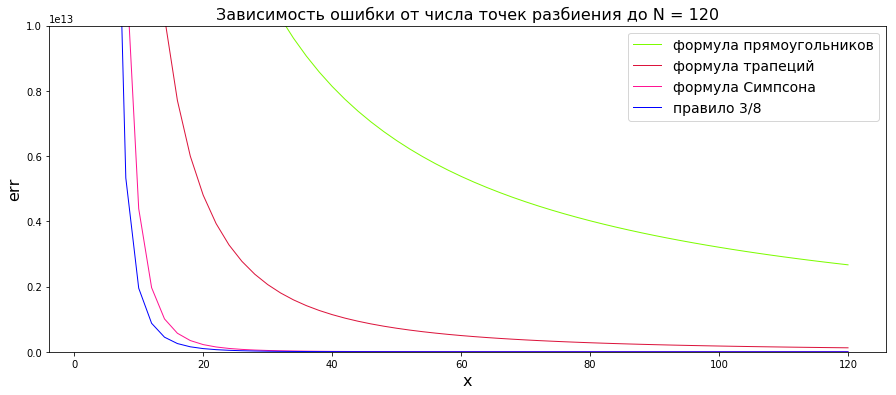

In [58]:
plt.figure(figsize=(15, 6))
plt.plot(Ns, err_sq1, color = 'lawngreen', label = "формула прямоугольников", linewidth = 1)
plt.plot(Ns, err_trap1, color = 'crimson', label = "формула трапеций", linewidth = 1)
plt.plot(Ns, err_simp1, color = 'deeppink', label = "формула Симпсона", linewidth = 1)
plt.plot(Ns, err_thre1, color = 'blue', label = "правило 3/8", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('err', fontsize=16)
plt.ylim(-0.1, 1e13)
plt.title("Зависимость ошибки от числа точек разбиения до N = 120", fontsize=16)
plt.legend(fontsize=14)
plt.show()

Итак, можем увидеть, что формула Симпсона и "правило 3/8" с увеличением узлов разбиения достигают вполне приемлемого значения ошибки. Формула трапеций дает результат похуже, а вот формула прямоугольников вообще дает плохой результат: погрешность очень большая.

**1.2**

Рассмотрим значения интеграла при 120 и 1200 точках:

In [59]:
print('Формула прямоугольников, 120 точек: ', squares(func_1, 120, 0, 5))
print('Формула трапеций, 120 точек: ', trapezes(func_1, 120, 0, 5))
print('Формула Симпсона, 120 точек: ', simpson(func_1, 120, 0, 5))
print('Правило 3/8, 120 точек: ', threes(func_1, 120, 0, 5))

Формула прямоугольников, 120 точек:  79605079046.66524
Формула трапеций, 120 точек:  60384066754.572525
Формула Симпсона, 120 точек:  58528063736.49483
Правило 3/8, 120 точек:  58526801033.90666


In [60]:
print('Формула прямоугольников, 1200 точек: ', squares(func_1, 1200, 0, 5))
print('Формула трапеций, 1200 точек: ', trapezes(func_1, 1200, 0, 5))
print('Формула Симпсона, 1200 точек: ', simpson(func_1, 1200, 0, 5))
print('Правило 3/8, 1200 точек: ', threes(func_1, 1200, 0, 5))

Формула прямоугольников, 1200 точек:  60451856393.1095
Формула трапеций, 1200 точек:  58544182946.27126
Формула Симпсона, 1200 точек:  58525789444.19957
Правило 3/8, 1200 точек:  58525789320.597176


Как можно заметить, после 120 точек последние 2 формулы дают похожие результаты: и число знаков одинаковое, и первые 4 разряда числа совпадают, притом что число очень большое, так что этот результат неплохой.

После 1200 точек последние два способа вообще дали отличные результаты, формула трапеций тоже примерно подошла к нужному ответу, а вот результат по формуле прямоугольников все еще недостаточно близкий (но уже значительно лучше, чем при 120 и тем более при 12 точках).

Посмотрим теперь, какая будет ошибка в каждой из формул:

In [61]:
print('Ошибка: формула прямоугольников, 120 точек: ', err_squares(0, 5, 120, der_func_1))
print('Ошибка: формула трапеций, 120 точек: ', err_trapezes(0, 5, 120, der2_func_1))
print('Ошибка: формула Симпсона, 120 точек: ', err_simpson(0, 5, 120, der4_func_1))
print('Ошибка: правило 3/8, 120 точек: ', err_threes(0, 5, 120, der4_func_1))

Ошибка: формула прямоугольников, 120 точек:  2666633568619.8228
Ошибка: формула трапеций, 120 точек:  122448409770.22835
Ошибка: формула Симпсона, 120 точек:  143589159.25198352
Ошибка: правило 3/8, 120 точек:  63817404.11199267


In [62]:
print('Ошибка: формула прямоугольников, 1200 точек: ', err_squares(0, 5, 1200, der_func_1))
print('Ошибка: формула трапеций, 1200 точек: ', err_trapezes(0, 5, 1200, der2_func_1))
print('Ошибка: формула Симпсона, 1200 точек: ', err_simpson(0, 5, 1200, der4_func_1))
print('Ошибка: правило 3/8, 1200 точек: ', err_threes(0, 5, 1200, der4_func_1))

Ошибка: формула прямоугольников, 1200 точек:  264661713649.507
Ошибка: формула трапеций, 1200 точек:  1206170509.5893805
Ошибка: формула Симпсона, 1200 точек:  13932.619150508857
Ошибка: правило 3/8, 1200 точек:  6192.275178003937


Как мы видим, ошибка падает при увеличении числа отрезков разбиения. Кроме того, у последнего способа ошибка самая маленькая, в то время как формула прямоугольников дает самое плохое приближение.

График, построенный в предыдущем пункте, подтверждает полученные теперь уже численно результаты.

**1.3** Рассчитайте по квадратурным формулам Ньютона-Котеса (формула прямоугольников, формула трапеций, формула Симпсона, «правило 3/8») определённый интеграл $\int_{0}^{1}(x^{2} + 2x -1)dx$. Для расчёта возмите 12 точек. Сравните результаты для разных квадратурных формул и на отдельном графике погрешность при расчёте при разном разбиении отрезка интегрирования.
Сравните результаты с точным значением интеграла. Постройте график зависимости нормы погрешности от шага интегрирования (или разбиения отрезка интегрирования).

In [64]:
def func_3(x):
    return x * x + 2 * x - 1

def der1_func3(x):
    return 2*x + 2

def der2_func3(x):
    return 2

def der4_func3(x):
    return 0

In [4]:
print('Точное значение: 0.333333333333')
print('Формула прямоугольников, 12 точек: ', squares(func_3, 12, 0, 1))
print('Формула трапеций, 12 точек: ', trapezes(func_3, 12, 0, 1))
print('Формула Симпсона, 12 точек: ', simpson(func_3, 12, 0, 1))
print('Правило 3/8, 12 точек: ', threes(func_3, 12, 0, 1))

Точное значение: 0.333333333333
Формула прямоугольников, 12 точек:  0.47107438016528924
Формула трапеций, 12 точек:  0.33471074380165283
Формула Симпсона, 12 точек:  0.33333333333333326
Правило 3/8, 12 точек:  0.33333333333333337


Вообще на 12 точках все результаты уже неплохие, но 3-й и 4-й вообще почти идеально совпадают.

Посмотрим, какая у нас ошибка:

In [17]:
print('Ошибка: формула прямоугольников, 12 точек: ', err_squares(0, 1, 12, der1_func3))
print('Ошибка: формула трапеций, 12 точек: ', err_trapezes(0, 1, 12, der2_func3))
print('Ошибка: формула Симпсона, 12 точек: ', err_simpson(0, 1, 12, der4_func3))
print('Ошибка: правило 3/8, 12 точек: ', err_threes(0, 1, 12, der4_func3))

Ошибка: формула прямоугольников, 12 точек:  0.36363636363636365
Ошибка: формула трапеций, 12 точек:  0.0013774104683195593
Ошибка: формула Симпсона, 12 точек:  0.0
Ошибка: правило 3/8, 12 точек:  0.0


Рассмотрим зависимости ошибки от количества точек разбиения:

In [27]:
Ns = np.arange(2, 12)
err_sq = []
err_trap = []
err_simp = []
err_thre = []

for N in Ns:
    err_sq.append(err_squares(0, 1, N, der1_func3))
    err_trap.append(err_trapezes(0, 1, N, der2_func3))
    err_simp.append(err_simpson(0, 1, N, der4_func3))
    err_thre.append(err_threes(0, 1, N, der4_func3))

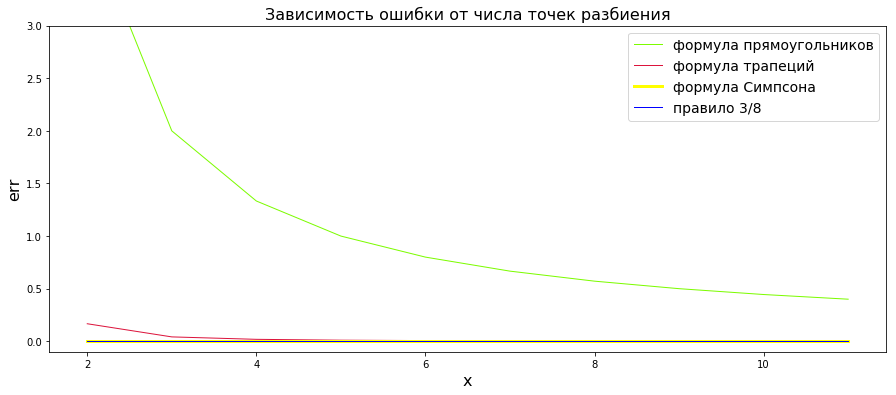

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(Ns, err_sq, color = 'lawngreen', label = "формула прямоугольников", linewidth = 1)
plt.plot(Ns, err_trap, color = 'crimson', label = "формула трапеций", linewidth = 1)
plt.plot(Ns, err_simp, color = 'yellow', label = "формула Симпсона", linewidth = 3)
plt.plot(Ns, err_thre, color = 'blue', label = "правило 3/8", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('err', fontsize=16)
plt.ylim(-0.1, 3)
plt.title("Зависимость ошибки от числа точек разбиения", fontsize=16)
plt.legend(fontsize=14)
plt.show()

Как можно заметить, формулы Симпсона и "правило 3/8" сходятся почти сразу, формула трапеций тоже довольно быстро достигает маленькой погрешности, а вот у формулы прямоугольников погрешность самая большая.

**1.4** Проведите аналогичный расчёт для 120 и 1200 точек (из п. 1.3). Сравните результаты для разных формул и оцените погрешность при расчёте на разном разбиении отрезка интегрирования.

In [96]:
print('Точное значение: 0.333333333333')
print('Формула прямоугольников, 120 точек: ', squares(func_3, 120, 0, 1))
print('Формула трапеций, 120 точек: ', trapezes(func_3, 120, 0, 1))
print('Формула Симпсона, 120 точек: ', simpson(func_3, 120, 0, 1))
print('Правило 3/8, 120 точек: ', threes(func_3, 120, 0, 1))

Точное значение: 0.333333333333
Формула прямоугольников, 120 точек:  0.34595014476378794
Формула трапеций, 120 точек:  0.3333451027469811
Формула Симпсона, 120 точек:  0.33333333333333337
Правило 3/8, 120 точек:  0.33333333333333326


In [97]:
print('Точное значение: 0.333333333333')
print('Формула прямоугольников, 1200 точек: ', squares(func_3, 1200, 0, 1))
print('Формула трапеций, 1200 точек: ', trapezes(func_3, 1200, 0, 1))
print('Формула Симпсона, 1200 точек: ', simpson(func_3, 1200, 0, 1))
print('Правило 3/8, 1200 точек: ', threes(func_3, 1200, 0, 1))

Точное значение: 0.333333333333
Формула прямоугольников, 1200 точек:  0.3345844918026626
Формула трапеций, 1200 точек:  0.33333344926721603
Формула Симпсона, 1200 точек:  0.3333333333333332
Правило 3/8, 1200 точек:  0.3333333333333333


При 1200 узлах даже формула прямоугольников (которая всегда давала самый некачественный ответ) дала неплохой результат.

Рассмотрим ошибку:

In [33]:
print('Ошибка: формула прямоугольников, 120 точек: ', err_squares(0, 1, 120, der1_func3))
print('Ошибка: формула трапеций, 120 точек: ', err_trapezes(0, 1, 120, der2_func3))
print('Ошибка: формула Симпсона, 120 точек: ', err_simpson(0, 1, 120, der4_func3))
print('Ошибка: правило 3/8, 120 точек: ', err_threes(0, 1, 120, der4_func3))

Ошибка: формула прямоугольников, 120 точек:  0.03361344537815126
Ошибка: формула трапеций, 120 точек:  1.1769413647812065e-05
Ошибка: формула Симпсона, 120 точек:  0.0
Ошибка: правило 3/8, 120 точек:  0.0


In [34]:
print('Ошибка: формула прямоугольников, 1200 точек: ', err_squares(0, 1, 1200, der1_func3))
print('Ошибка: формула трапеций, 1200 точек: ', err_trapezes(0, 1, 1200, der2_func3))
print('Ошибка: формула Симпсона, 1200 точек: ', err_simpson(0, 1, 1200, der4_func3))
print('Ошибка: правило 3/8, 1200 точек: ', err_threes(0, 1, 1200, der4_func3))

Ошибка: формула прямоугольников, 1200 точек:  0.003336113427856547
Ошибка: формула трапеций, 1200 точек:  1.159338833700496e-07
Ошибка: формула Симпсона, 1200 точек:  0.0
Ошибка: правило 3/8, 1200 точек:  0.0


Рассмотрим зависимость ошибки от количества точек разбиения:

In [65]:
Ns = np.arange(2, 121)
err_sq = []
err_trap = []
err_simp = []
err_thre = []

for N in Ns:
    err_sq.append(err_squares(0, 1, N, der1_func3))
    err_trap.append(err_trapezes(0, 1, N, der2_func3))
    err_simp.append(err_simpson(0, 1, N, der4_func3))
    err_thre.append(err_threes(0, 1, N, der4_func3))

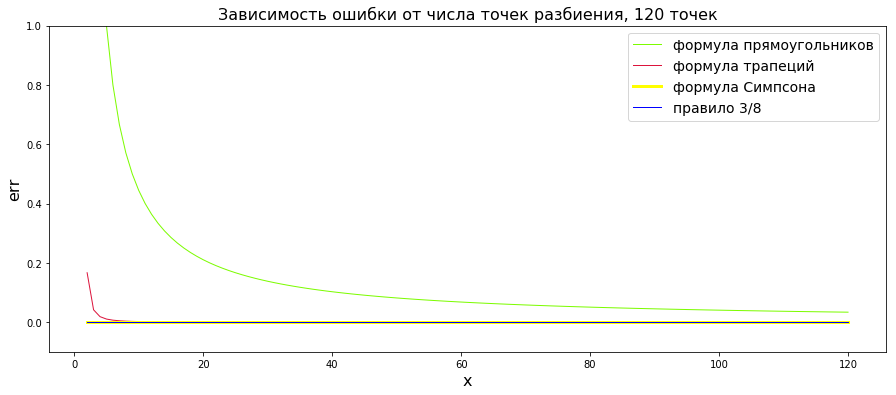

In [66]:
plt.figure(figsize=(15, 6))
plt.plot(Ns, err_sq, color = 'lawngreen', label = "формула прямоугольников", linewidth = 1)
plt.plot(Ns, err_trap, color = 'crimson', label = "формула трапеций", linewidth = 1)
plt.plot(Ns, err_simp, color = 'yellow', label = "формула Симпсона", linewidth = 3)
plt.plot(Ns, err_thre, color = 'blue', label = "правило 3/8", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('err', fontsize=16)
plt.ylim(-0.1, 1)
plt.title("Зависимость ошибки от числа точек разбиения, 120 точек", fontsize=16)
plt.legend(fontsize=14)
plt.show()

Для 1200:

In [35]:
Ns = np.arange(2, 1201)
err_sq = []
err_trap = []
err_simp = []
err_thre = []

for N in Ns:
    err_sq.append(err_squares(0, 1, N, der1_func3))
    err_trap.append(err_trapezes(0, 1, N, der2_func3))
    err_simp.append(err_simpson(0, 1, N, der4_func3))
    err_thre.append(err_threes(0, 1, N, der4_func3))

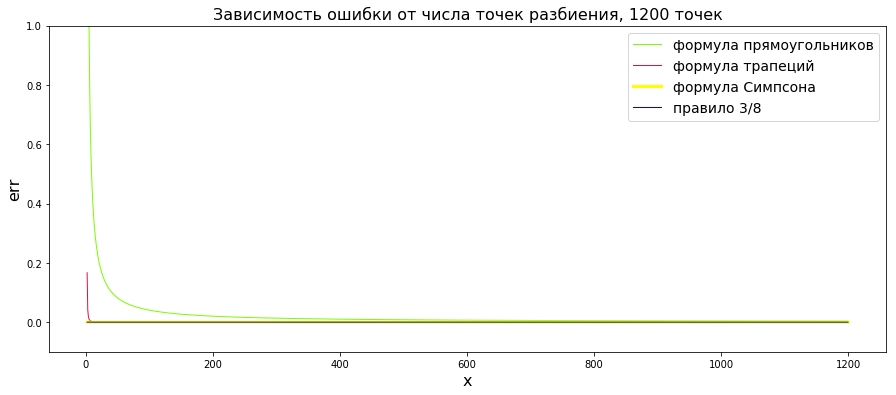

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(Ns, err_sq, color = 'lawngreen', label = "формула прямоугольников", linewidth = 1)
plt.plot(Ns, err_trap, color = 'crimson', label = "формула трапеций", linewidth = 1)
plt.plot(Ns, err_simp, color = 'yellow', label = "формула Симпсона", linewidth = 3)
plt.plot(Ns, err_thre, color = 'blue', label = "правило 3/8", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('err', fontsize=16)
plt.ylim(-0.1, 1)
plt.title("Зависимость ошибки от числа точек разбиения, 1200 точек", fontsize=16)
plt.legend(fontsize=14)
plt.show()

<h2> Задание 2

2.1 Оцените минимальное число узлов, необходимых для вычисления интеграла $$
\int_0^1\! \frac{dx}{1 + \frac{x^{2}}{3}}\, dx
$$
с точностью $\epsilon = 10^{-2}$ по методам трапеций, Симпсона и квадратур Гаусса. 

2.2 Вычислите интеграл с заданной точностью
любым из этих методов.

**2.1**


In [54]:
def func_2(x):
    res = 1 /( 1 + x * x / 3)
    return res

def der2_func_2(x):
    res = (8*x * x)/(9 *(x*x/3 + 1)**3) - 2/(3* (x*x/3 + 1)**2)
    return res

def der4_func_2(x):
    res = -(32 * x*x)/(3 *(x*x/3 + 1)**4) + 8 /(3 *(x*x/3 + 1)**3) + (128 * x ** 4)/(27* (x*x/3 + 1)**5)
    return res

In [79]:
def err_trapezes2(a, b, n, der2_f):
    max_abs = max_f(der2_f, a, b)
    h = (b-a) / (n-1)
    eps = max_abs * (b-a) * h * h/12
    return eps

def err_simpson(a, b, n, der4_f):
    max_abs = max_f(der4_f, a, b)
    h = (b-a) / (n-1)
    eps = max_abs * (b-a) * h * h * h * h/2880
    return eps

def err_gauss(a, b, n, der2_f, der4_f):
    if n == 1:
        return max_f(der2_f, a, b) * (b-a) **3 / 24
    if n == 2:
        return max_f(der4_f, a, b) * (b-a)**5 / 4320

In [76]:
for n in range(2, 100):
    if err_trapezes2(0, 1, n, der2_func_2) <= 0.01:
        print('Метод трапеций: N =', n)
        break

Метод трапеций: N = 4


In [77]:
for n in range(2, 100):
    if err_simpson(0, 1, n, der4_func_2) <= 0.01:
        print('Метод Симпсона: N =', n)
        break

Метод Симпсона: N = 2


In [80]:
err_gauss(0, 1, 1, der2_func_2, der4_func_2 )

0.027777777777777776

In [81]:
# это больше 0.01, берем 2 узла
err_gauss(0, 1, 2, der2_func_2, der4_func_2 )

0.0006172839506172839

Это меньше 0.01, так что:

Гаусс: N = 2

Итого, методы:

* Трапеций: 4 узла
* Симпсона: 2 узла
* Гаусса: 2 узла

**2.2**

Я вычислю методом Симпсона:

In [ ]:
# формула Симпсона
def simpson(f, N, a, b):
    xes = np.array(np.linspace(a, b, N))
    integral = 0
    for i in range(xes.shape[0] - 1):
        integral += (xes[i+1] - xes[i]) * (f(xes[i]) + f(xes[i+1]) + 4 * f(0.5*(xes[i+1] - xes[i]) + xes[i])) / 6
    return integral

In [82]:
simpson(func_2, 2, 0, 1)

0.907051282051282

Ответ: $0.907051282051282$